In [12]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [13]:
evidence_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/190719_Hela_Ecoli-research-combined/txt/evidence.txt', sep='\\t', engine='python')

In [14]:
# remove decoys, which are indicated by a '+' in the Reverse column, and features with no intensity
evidence_filtered_df = evidence_df[pd.isna(evidence_df.Reverse) & (evidence_df.Intensity > 0) & pd.notnull(evidence_df['Modified sequence'])]

In [15]:
len(evidence_filtered_df)

300577

In [16]:
modified_sequences_count = len(evidence_filtered_df['Modified sequence'].unique())
modified_sequences_count

27829

In [17]:
proteins_count = len(evidence_filtered_df['Protein names'].unique())
proteins_count

5581

In [18]:
evidence_filtered_df.columns

Index(['Sequence', 'Length', 'Modifications', 'Modified sequence',
       'Oxidation (M) Probabilities', 'Oxidation (M) Score Diffs',
       'Acetyl (Protein N-term)', 'Oxidation (M)', 'Missed cleavages',
       'Proteins', 'Leading proteins', 'Leading razor protein', 'Gene names',
       'Protein names', 'Type', 'Raw file', 'Experiment', 'MS/MS m/z',
       'Charge', 'm/z', 'Mass', 'Resolution',
       'Uncalibrated - Calibrated m/z [ppm]',
       'Uncalibrated - Calibrated m/z [Da]', 'Mass error [ppm]',
       'Mass error [Da]', 'Uncalibrated mass error [ppm]',
       'Uncalibrated mass error [Da]', 'Max intensity m/z 0', 'Retention time',
       'Retention length', 'Calibrated retention time',
       'Calibrated retention time start', 'Calibrated retention time finish',
       'Retention time calibration', 'Ion mobility index',
       'Ion mobility length', '1/K0', '1/K0 length', 'Calibrated 1/K0', 'CCS',
       'CCS length', 'Match time difference', 'Match m/z difference',
       '

In [19]:
evidence_filtered_df[['Sequence','Charge','Raw file','Modified sequence','Type']].sample(10)

,Sequence,Charge,Raw file,Modified sequence,Type
346755,NMINVALNNGTLQHPVK,3,190719_Hela_Ecoli_1to1_09_Slot1-1_1_1944,_NMINVALNNGTLQHPVK_,TIMS-MULTI-MSMS
16876,AGIALNDNFVK,2,190719_Hela_Ecoli_1to3_09_Slot1-2_1_1951,_AGIALNDNFVK_,TIMS-MULTI-MSMS
493610,VGSLDNVGHLPAGGAVK,2,190719_Hela_Ecoli_1to1_04_Slot1-1_1_1929,_VGSLDNVGHLPAGGAVK_,TIMS-MULTI-MSMS
53614,CMHCSGENYEGK,2,190719_Hela_Ecoli_1to1_01_Slot1-1_1_1926,_CMHCSGENYEGK_,TIMS-MULTI-MSMS
291566,LMETQEEDVVLLTAGEHNK,3,190719_Hela_Ecoli_1to1_10_Slot1-1_1_1945,_LMETQEEDVVLLTAGEHNK_,TIMS-MULTI-MSMS
135810,FAFQAEVNR,2,190719_Hela_Ecoli_1to1_05_Slot1-1_1_1930,_FAFQAEVNR_,TIMS-MULTI-MSMS
356220,NVLGHMQQGGSPTPFDR,2,190719_Hela_Ecoli_1to1_05_Slot1-1_1_1930,_NVLGHMQQGGSPTPFDR_,TIMS-MULTI-MSMS
66308,DFLTPPLLSVR,2,190719_Hela_Ecoli_1to3_06_Slot1-2_1_1948,_DFLTPPLLSVR_,TIMS-MULTI-MSMS
519718,VVGIHMQGLGCDEMLQGFAVAVK,3,190719_Hela_Ecoli_1to1_07_Slot1-1_1_1942,_VVGIHMQGLGCDEMLQGFAVAVK_,TIMS-MULTI-MSMS
505741,VNIAFNYDMPEDSDTYLHR,2,190719_Hela_Ecoli_1to1_08_Slot1-1_1_1943,_VNIAFNYDMPEDSDTYLHR_,TIMS-MULTI-MSMS


In [20]:
# for a sequence and charge, how many files did it appear in?
sequence_unique_file_counts_l = []
for group_name,group_df in evidence_df.groupby(['Modified sequence','Charge'], as_index=False):
    files = group_df['Raw file'].unique()
    unique_file_count = len(files)
    sequence_unique_file_counts_l.append((group_name[0],group_name[1],unique_file_count,files))
sequence_unique_file_counts_df = pd.DataFrame(sequence_unique_file_counts_l, columns=['modified_sequence','charge','number_of_files','files'])

In [21]:
sequence_unique_file_counts_df.sample(10)

,modified_sequence,charge,number_of_files,files
26653,_VCNDEQLLLELQQIK_,2,18,"[190719_Hela_Ecoli_1to3_07_Slot1-2_1_1949, 190..."
24751,_TEDVDQVTVYSYK_,2,12,"[190719_Hela_Ecoli_1to3_07_Slot1-2_1_1949, 190..."
3839,_DFAPGSQLPILLYDSDAK_,2,16,"[190719_Hela_Ecoli_1to3_07_Slot1-2_1_1949, 190..."
5708,_EDVSLHGYK_,2,3,"[190719_Hela_Ecoli_1to1_04_Slot1-1_1_1929, 190..."
748,_ADDMSDDQGTSVQSK_,2,13,"[190719_Hela_Ecoli_1to1_04_Slot1-1_1_1929, 190..."
4465,_DLVHAIPLYAIK_,2,20,"[190719_Hela_Ecoli_1to3_07_Slot1-2_1_1949, 190..."
18216,_MNYSGDQGQTIR_,2,2,"[190719_Hela_Ecoli_1to3_09_Slot1-2_1_1951, 190..."
8404,_FMEPVTMQESGTFAFR_,2,1,[190719_Hela_Ecoli_1to1_05_Slot1-1_1_1930]
15798,_LIHIPINNIIVGG_,2,8,"[190719_Hela_Ecoli_1to3_08_Slot1-2_1_1950, 190..."
4098,_DHSVAESLNYVASWNMSMLQTQDLVK_,3,15,"[190719_Hela_Ecoli_1to3_07_Slot1-2_1_1949, 190..."


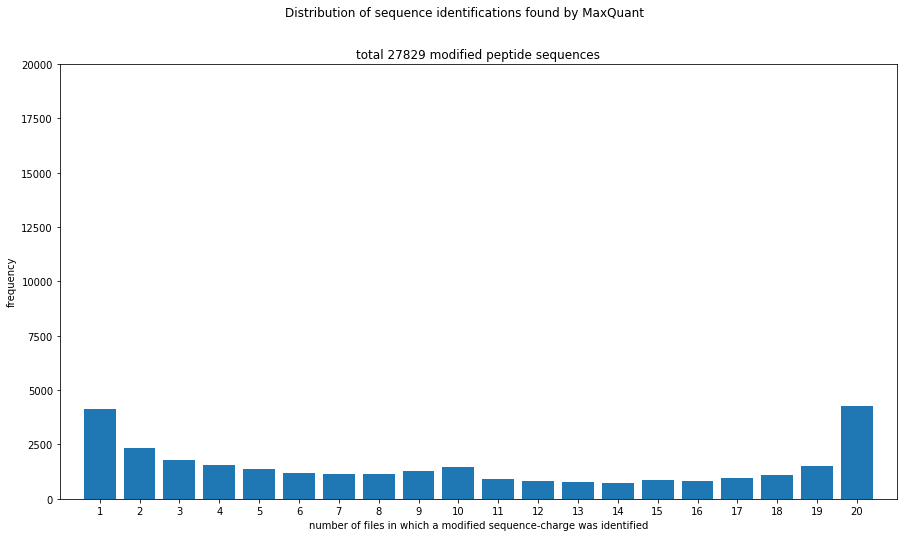

In [22]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.suptitle('Distribution of sequence identifications found by MaxQuant')
plt.title('total {} modified peptide sequences'.format(modified_sequences_count))

counts = np.bincount(sequence_unique_file_counts_df.number_of_files)
ax1.bar(range(21), counts, width=0.8, align='center')
plt.xlabel('number of files in which a modified sequence-charge was identified')
plt.ylabel('frequency')
ax1.set(xticks=range(1,21), xlim=[0, 21])
plt.ylim((0,20000))

plt.show()

In [23]:
sequence_unique_file_counts_df['missing_files'] = 20 - sequence_unique_file_counts_df.number_of_files

In [24]:
sequence_unique_file_counts_df.sample(10)

,modified_sequence,charge,number_of_files,files,missing_files
6826,_ENDAHLVEVNLNNIK_,2,3,"[190719_Hela_Ecoli_1to1_07_Slot1-1_1_1942, 190...",17
21319,_QLGQDLLNSYIENEGK_,2,1,[190719_Hela_Ecoli_1to1_04_Slot1-1_1_1929],19
17571,_LVVPASQCGSLIGK_,2,9,"[190719_Hela_Ecoli_1to3_08_Slot1-2_1_1950, 190...",11
23368,_SLIGVEYKPVSATGAEDK_,2,13,"[190719_Hela_Ecoli_1to1_04_Slot1-1_1_1929, 190...",7
25949,_TSQTVATFLDELAQK_,2,20,"[190719_Hela_Ecoli_1to3_07_Slot1-2_1_1949, 190...",0
4444,_DLSSPSQYDTGVALTGLSCFVTPDLAR_,3,1,[190719_Hela_Ecoli_1to3_07_Slot1-2_1_1949],19
10194,_GNDMQVGTYIEK_,2,4,"[190719_Hela_Ecoli_1to1_04_Slot1-1_1_1929, 190...",16
7564,_EVNEGIQALSNSEEEK_,2,13,"[190719_Hela_Ecoli_1to1_04_Slot1-1_1_1929, 190...",7
20533,_PSIIFIDEVDSLCGSR_,2,2,"[190719_Hela_Ecoli_1to1_02_Slot1-1_1_1927, 190...",18
11719,_HQFAQSLNYEIAK_,2,16,"[190719_Hela_Ecoli_1to3_07_Slot1-2_1_1949, 190...",4


In [25]:
proportion_of_missing_values = sequence_unique_file_counts_df.missing_files.sum() / (len(sequence_unique_file_counts_df) * 20)
proportion_of_missing_values

0.5121592527574442